<a href="https://colab.research.google.com/github/rahiakela/practical-natural-language-processing/blob/chapter-3-text-representation/9_visualizing_embeddings_using_t_sne.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Visualizing Embeddings Using TSNE

Visual exploration is a very important aspect of any data-related problem. Is there a way to visually inspect word vectors? Even though embeddings are low-dimensional vectors, even 100 or 300 dimensions are too high to visualize.

Enter t-SNE, or t-distributed Stochastic Neighboring Embedding. It’s a technique used for visualizing high-dimensional data like embeddings by reducing them to twoor three-dimensional data. The technique takes in the embeddings (or any data) and looks at how to best represent the input data using lesser dimensions, all while maintaining the same data distributions in original high-dimensional input space and low-dimensional output space. This, therefore, enables us to plot and visualize the input data. It helps to get a feel for the space of word embedding.

<img src='https://github.com/rahiakela/img-repo/blob/master/practical-nlp/t-sne-mnist.png?raw=1' width='800'/>

Let’s look at some visualizations using t-SNE. First, we look at feature vectors obtained from the MNIST digits dataset. Here, the images are passed through a convolution neural network and the final feature vectors.

<img src='https://github.com/rahiakela/img-repo/blob/master/practical-nlp/t-sne-word2vec.png?raw=1' width='800'/>

Let’s look at another word embedding visualization, probably the most famous one in the NLP community.

<img src='https://github.com/rahiakela/img-repo/blob/master/practical-nlp/t-sne-relationship.png?raw=1' width='800'/>

t-SNE works equally well for visualizing document embeddings. For example, we might take Wikipedia articles on various topics, obtain corresponding document vectors for each article, then plot these vectors using t-SNE.

<img src='https://github.com/rahiakela/img-repo/blob/master/practical-nlp/t-sne-doc2vec.png?raw=1' width='800'/>

## Setup

In [1]:
# download pre-trained word2vec model
!wget -P /tmp/input/ -c "https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz"

--2020-09-17 11:42:03--  https://s3.amazonaws.com/dl4j-distribution/GoogleNews-vectors-negative300.bin.gz
Resolving s3.amazonaws.com (s3.amazonaws.com)... 52.216.18.187
Connecting to s3.amazonaws.com (s3.amazonaws.com)|52.216.18.187|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 1647046227 (1.5G) [application/x-gzip]
Saving to: ‘/tmp/input/GoogleNews-vectors-negative300.bin.gz’

GoogleNews-vectors- 100%[===================>]   1.53G  62.5MB/s    in 26s     

2020-09-17 11:42:29 (60.8 MB/s) - ‘/tmp/input/GoogleNews-vectors-negative300.bin.gz’ saved [1647046227/1647046227]



In [11]:
from gensim.models import Word2Vec, KeyedVectors #To load the model
import warnings
warnings.filterwarnings('ignore') #ignore any generated warnings

import numpy as np
import matplotlib.pyplot as plt #to generate the t-SNE plot
from sklearn.manifold import TSNE #scikit learn's TSNE
import matplotlib.cm as cm
%matplotlib inline

In [5]:
import nltk
from nltk.corpus import stopwords
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

In [4]:
# load model
pretrainedpath = '/tmp/input/GoogleNews-vectors-negative300.bin.gz'
model = KeyedVectors.load_word2vec_format(pretrainedpath, binary=True)

## TSNE

Let’s now visualize word embeddings. We show only a few words. The
interesting thing to note is that the words that have similar meanings tend to cluster together. Visualizing

In [6]:
# Preprocessing our models vocabulary to make better visualizations
words_vocab = list(model.wv.vocab)  # all the words in the vocabulary.
print("Size of Vocabulary:",len(words_vocab))
print("Few words in Vocabulary",words_vocab[:50])

# Let us remove the stop words from this it will help making the visualization cleaner
stopwords_en = stopwords.words()
words_vocab_without_sw = [word.lower() for word in words_vocab if not word in stopwords_en]
print("Size of Vocabulary without stopwords:",len(words_vocab_without_sw))
print("Few words in Vocabulary without stopwords",words_vocab_without_sw[:30])

Size of Vocabulary: 3000000
Few words in Vocabulary ['</s>', 'in', 'for', 'that', 'is', 'on', '##', 'The', 'with', 'said', 'was', 'the', 'at', 'not', 'as', 'it', 'be', 'from', 'by', 'are', 'I', 'have', 'he', 'will', 'has', '####', 'his', 'an', 'this', 'or', 'their', 'who', 'they', 'but', '$', 'had', 'year', 'were', 'we', 'more', '###', 'up', 'been', 'you', 'its', 'one', 'about', 'would', 'which', 'out']
Size of Vocabulary without stopwords: 2998714
Few words in Vocabulary without stopwords ['</s>', '##', 'the', 'said', 'i', '####', '$', 'year', '###', 'would', 'it', 'two', 'first', 'he', 'time', 'we', 'last', 'new', 'people', 'in', 'a', 'could', 'years', 'u.s.', 'three', 'million', 'but', 'like', 'percent', 'get']


The size didnt reduce much after removing the stop words so lets try visualizing only a selected subset of words.

With the increase in the amount of data, it becomes more and more difficult to visualize and interpret

In practice, similar words are combined into groups for further visualization.

In [8]:
keys = ['school', 'year', 'college', 'city', 'states', 'university', 'team', 'film']
embedding_clusters = []
word_clusters = []

for word in keys:
  embeddings = []
  words = []
  for similar_word, _ in model.most_similar(word, topn=30):
    words.append(similar_word)
    embeddings.append(model[similar_word])
  embedding_clusters.append(embeddings)    # apending access vector of all similar words
  word_clusters.append(words)              # appending list of all smiliar words

In [9]:
print("Embedding clusters:",embedding_clusters[0][0])#Access vector of the first word only
print("Word Clousters:",word_clusters[:2])

Embedding clusters: [ 0.21386719 -0.13476562  0.12011719  0.24902344 -0.05224609 -0.05053711
  0.25        0.05175781 -0.0020752  -0.03271484  0.09082031  0.06103516
  0.03955078 -0.34375     0.00318909 -0.05151367 -0.3203125   0.06591797
  0.10449219  0.02404785  0.15429688  0.19042969  0.04321289  0.07226562
 -0.02832031 -0.41796875  0.02807617  0.08007812  0.0078125  -0.13085938
 -0.01367188 -0.23632812 -0.0402832   0.08349609 -0.17773438 -0.19433594
  0.33007812  0.13476562  0.15429688  0.03613281 -0.09375     0.08935547
  0.203125   -0.05541992 -0.01806641  0.06591797  0.1796875   0.04638672
 -0.25390625  0.20117188 -0.20117188 -0.27734375 -0.04785156 -0.14648438
  0.12792969 -0.04150391 -0.16894531 -0.06396484 -0.07226562 -0.21289062
  0.09863281  0.11425781  0.14453125 -0.11328125  0.04418945  0.02062988
 -0.2265625   0.32421875 -0.01696777  0.11035156 -0.00680542  0.03833008
  0.02490234  0.2265625  -0.25585938  0.32421875  0.26757812 -0.04492188
  0.24804688  0.00074005  0.181

In [10]:
embedding_clusters = np.array(embedding_clusters)
n, m, k = embedding_clusters.shape    # geting the dimensions
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020)
# reshaping it into 2d so we can visualize it
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)

## Hyperparameters of TSNE

1. **n_components**: The number of components, i.e., the dimension of the value space
2. **perplexity**: The number of effective neighbours
3. **n_iter**: Maximum number of iterations for the optimization.
4. **init**: Initialization of embedding.

**t-SNE** requires good amount of hyperparameter tuning to give effective results. More details on the hyperparameters can be found in the official [docs](https://scikit-learn.org/stable/modules/generated/sklearn.manifold.TSNE.html). It is very easy to misread tsne too. This [article](https://distill.pub/2016/misread-tsne/) provides more deatils about it.

In [12]:
# constructing two-dimensional graphics using Matplotlib
def tsne_plot_similar_words(labels, embedding_clusters, word_clusters, a=0.7):
  plt.figure(figsize=(16, 9))

  for label, embeddings, words in zip(labels, embedding_clusters, word_clusters):
    x = embeddings[:, 0]
    y = embeddings[:, 1]
    plt.scatter(x, y, alpha=a, label=label)
    for i, word in enumerate(words):
      plt.annotate(word, alpha=0.5, xy=(x[i], y[i]), xytext=(5, 2), textcoords='offset points', ha='right', va='bottom', size=8)
  plt.legend(loc=4)
  plt.grid(True)
  plt.show()

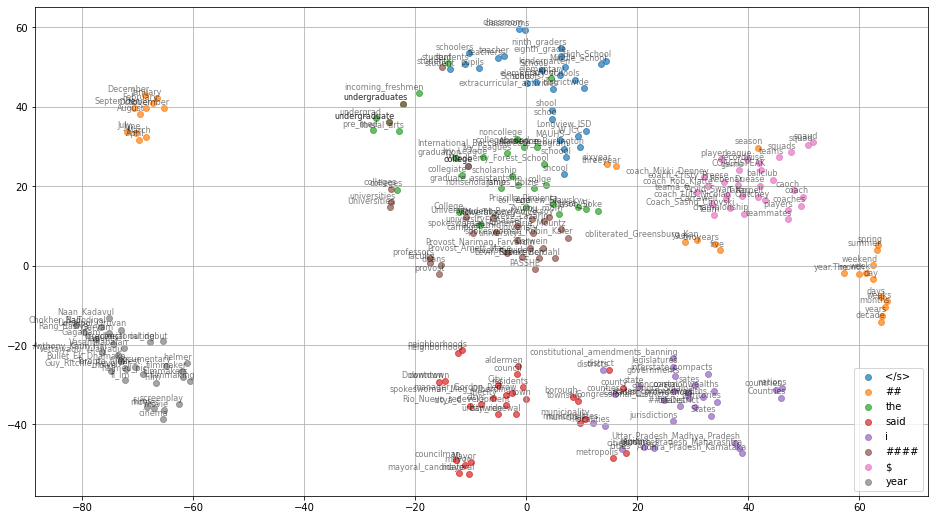

In [13]:
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

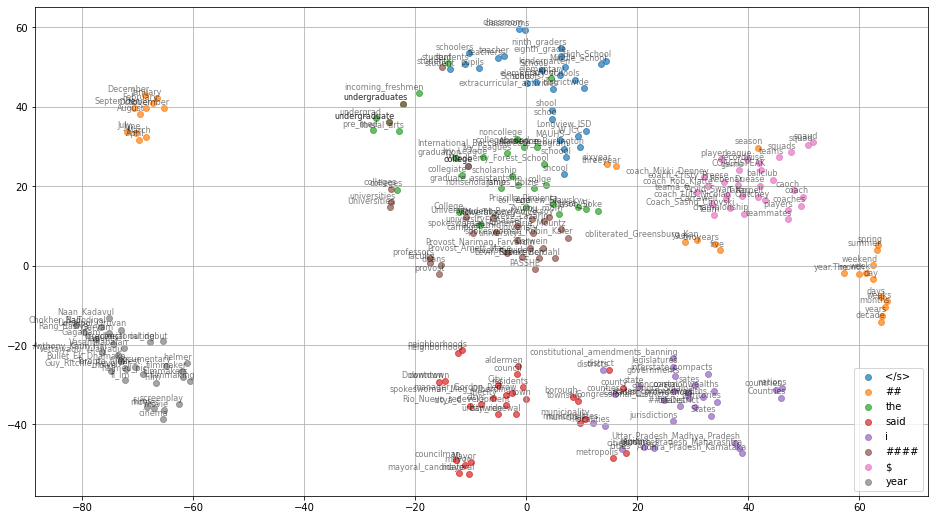

In [15]:
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020)
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

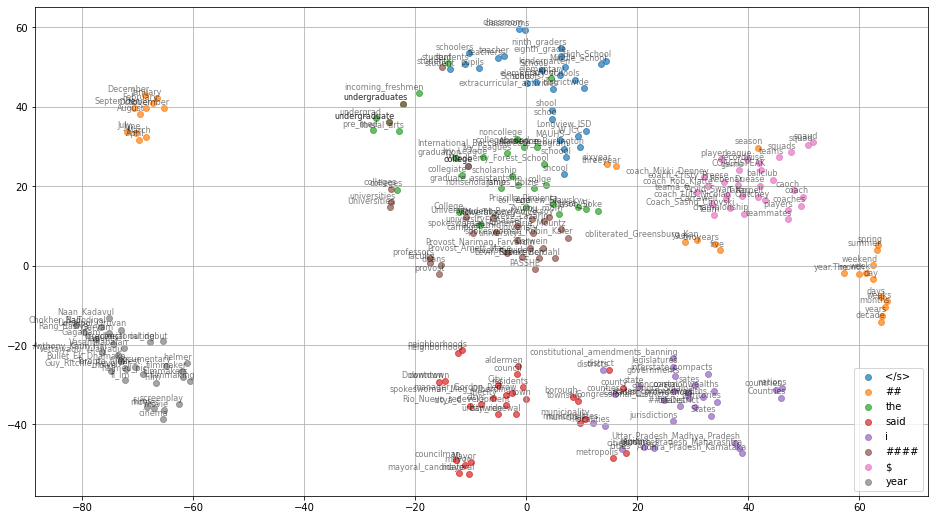

In [16]:
tsne_model_en_2d = TSNE(perplexity=5, n_components=2, init='pca', n_iter=1500, random_state=2020) 
embeddings_en_2d = np.array(tsne_model_en_2d.fit_transform(embedding_clusters.reshape(n * m, k))).reshape(n, m, 2)
tsne_plot_similar_words(words_vocab_without_sw, embeddings_en_2d, word_clusters)

We cannto say a higher or lower perplexity is good. It depends on the problem at hand. Here the plots of perplexity 5,10 are much better defined than the one with 25.